# Project: Investigate a Dataset of No-Shows Medical Appointments 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Overview

In this project, I used the data set of no-show medical appointments that collected from medical appointments in Brazil. The analysis will focus on no-show appointments. So, the questions will be as following:
    1. What is the overall percentage of show and no-show appointments?
    2. Which gender is display more no-show appointments?
    3. What ages of patients who miss their appointments?
    4. What is impact of sending SMS on rate of no-show? 

In [1]:
#import all needed libararies for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
#read No Show Medical appointments file by using pandas
ns=pd.read_csv('NoShow-MedAppt.csv')

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load your data and print out a few lines. 
ns.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#check for negative numbers in age field
ns[ns['Age']<0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


#### The data set has no null values nor duplicate rows, as in below: 

In [4]:
# Check for null values
pd.isna(ns).sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [5]:
# Check for duplicate data
ns.duplicated().sum()

0

### Assess data

In [6]:
# check data type of all fields
ns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### Data to be cleaned

    1.Some colomns are not going to be used : (Scholarship,Hipertension,Diabetes,Alcoholism,Handcap)
    2.One recored has age = -1
    3.The data type will be chaned for : (PatientId : float, ScheduledDay, AppointmentDay : object )

### Data Cleaning 

In [7]:
#Delete unsued columns
del_col=['Scholarship','Hipertension','Diabetes','Alcoholism','Handcap']
ns=ns.drop(del_col,axis=1)

In [8]:
# Drop negative number of age from data set
ns=ns[ns['Age']>=0]

In [9]:
#print out dataset
ns.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,No


In [10]:
# Change the data type 
ns['PatientId'] = ns.PatientId.apply(np.int64)
ns['AppointmentDay'] = pd.to_datetime(ns['AppointmentDay'])
ns['ScheduledDay'] = pd.to_datetime(ns['ScheduledDay'])

In [11]:
# check changes of data type on the fields
ns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 9 columns):
PatientId         110526 non-null int64
AppointmentID     110526 non-null int64
Gender            110526 non-null object
ScheduledDay      110526 non-null datetime64[ns, UTC]
AppointmentDay    110526 non-null datetime64[ns, UTC]
Age               110526 non-null int64
Neighbourhood     110526 non-null object
SMS_received      110526 non-null int64
No-show           110526 non-null object
dtypes: datetime64[ns, UTC](2), int64(4), object(3)
memory usage: 8.4+ MB


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (What is the overall  percentage of show and no-show appointments?)

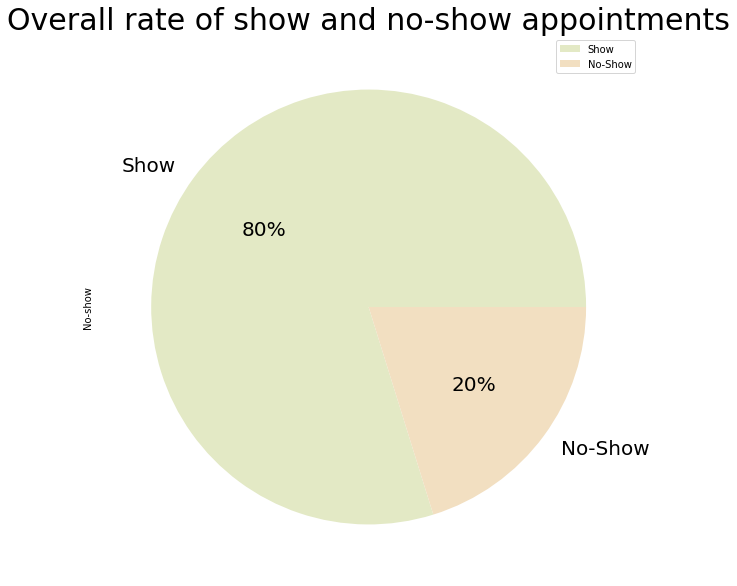

In [12]:
# Define a function that return number of rows based on values of specific column form  dataset 
def cou(x,y):
    data=pd.Series(y[x])
    count=data.value_counts(ascending=False)
    return count

# call cou function to get number no-show appt. based on values of No-show
appt=cou('No-show',ns)

# Draw pie-chart
plt.figure(figsize=(10,10))
appt.plot.pie(autopct='%.0f%%',fontsize=(20),colors=['#E3E9C5','#F2DFC1'], labels=['Show','No-Show'])
plt.title('Overall rate of show and no-show appointments',fontsize=(30))
plt.legend()

#### This graph illastrate the percentage of show and no-show appointments. It is clear that 80% of patients showed up for thier appointemnts. While, 20% of patients missed thier appointments. 

### Research Question 2  (Which gender is display more no-show appointments?)

In [13]:
# Extract the no-show dataset from main data to analyze it
no_show=ns[ns['No-show']=='Yes']
no_show.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,SMS_received,No-show
6,733688164476661,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,Yes
7,3449833394123,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,Yes
11,7542951368435,5620163,M,2016-04-26 08:44:12+00:00,2016-04-29 00:00:00+00:00,29,NOVA PALESTINA,1,Yes
17,14794966191172,5633460,F,2016-04-28 09:28:57+00:00,2016-04-29 00:00:00+00:00,40,CONQUISTA,0,Yes
20,622257462899397,5626083,F,2016-04-27 07:51:14+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,Yes


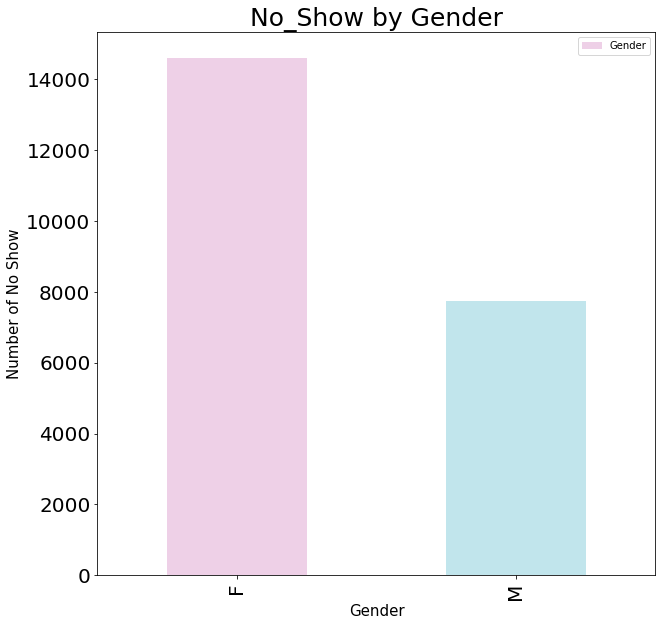

In [14]:
# call cou function to get number no-show appt. based on values of Gender
gend=cou('Gender',no_show)

#Draw bar chart
plt.figure(figsize=(10,10))
gend.plot.bar(fontsize=(20),color=['#EED0E7','#C1E5EC'])
plt.xlabel("Gender",fontsize=(15))
plt.ylabel("Number of No Show",fontsize=(15))
plt.title('No_Show by Gender',fontsize=(25))
plt.legend()

#### It is clear from this chart, the number of females who missed their appointment is nearly double the number of men.

### Research Question 3  (What ages of patients who miss their appointments?)

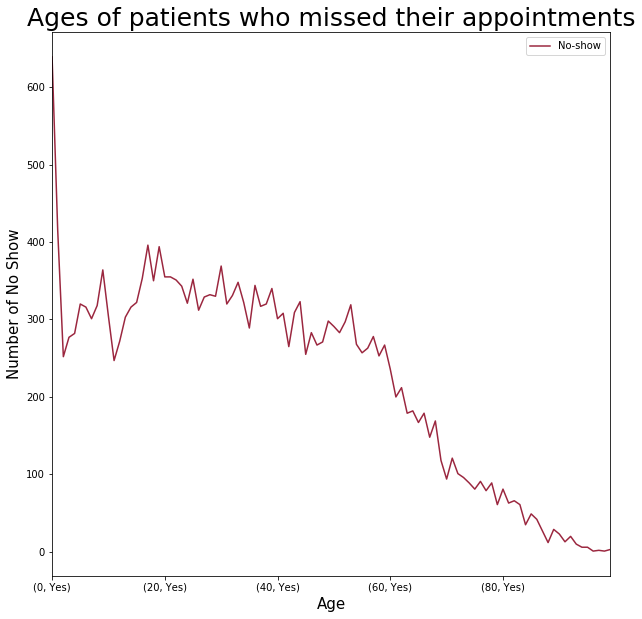

In [15]:
#Grouping by Age for patients who missed thier appointemnts
age=no_show.groupby('Age')['No-show'].value_counts()

#Draw line chart
plt.figure(figsize=(10,10))
age.plot(kind='line',color=('#9B273F'))
plt.xlabel("Age",fontsize=(15))
plt.ylabel("Number of No Show",fontsize=(15))
plt.title('Ages of patients who missed their appointments',fontsize=(25))
plt.legend()

#### From this chart, It is obvious that the rate of no-show appointments is high for ages between 15 to 30 years. Then, the rate is gradually decreased until ages after 80 years.

### Research Question 4  (What is impact of sending SMS  on rate of no-show? )

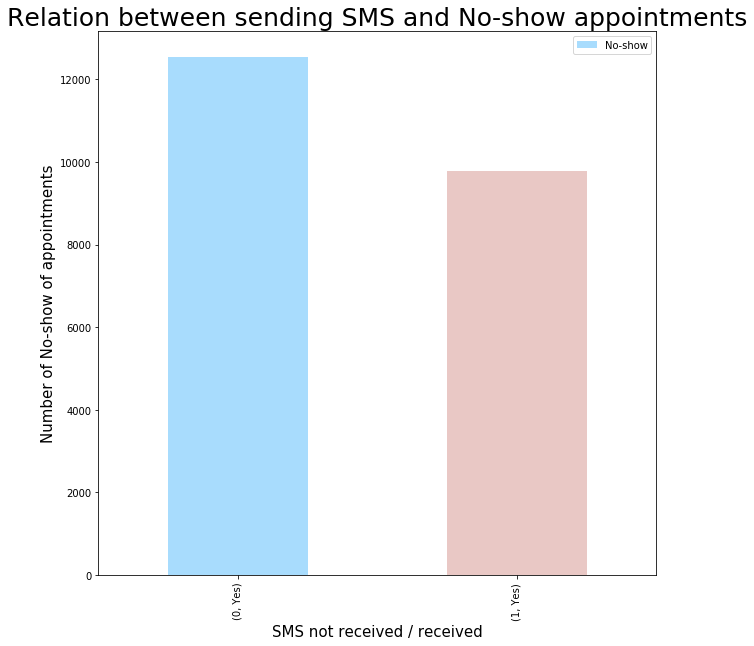

In [32]:
# Grouping by SMS_received for patients who missed thier appointemnts
sms=no_show.groupby('SMS_received')['No-show'].value_counts() 

#Draw bar chart
plt.figure(figsize=(10,10))
sms.plot(kind='bar',color=['#A8DCFD','#E9C8C5'])
plt.xlabel("SMS not received / received",fontsize=(15))
plt.ylabel("Number of No-show of appointments",fontsize=(15))
plt.title('Relation between sending SMS and No-show appointments',fontsize=(25))
plt.legend()

#### This chart depicts the relation between sending SMS messages and No-show appointments. There is a slight difference in the number of no-show appointments for patient who did not receive any SMS hitted to 12000 appointments. While, it is reached to around 10000 no-show appointments for whom received SMS .

<a id='conclusions'></a>
## Conclusions



### Observations

According from above analysis, we can find that:
    1. Although the percent of no-show appointments is less than showed up appointments, but it is still considered as high rate of attrition for healthcare providers.
    2. It is appear that females had more no-show appointments.
    3. no-show appointments reported high rate for ages between 15-30 years.
    4. SMS messages is not powerfull option to decrease the number of no-show appointments.  

### Limitations


#### There are some limitations in the No-show appointments Dataset as:
  1. The features are not enough to identify the real reason of no-show appointments. It is important to have more details such as occupation, marital status,address, any serious medical condition. 
  2. The data had been collected from different cities, and it is not clear if the its healthcare centers that the data have been collected from have the same capabilities in service, technology..etc.
